## Data Exploration
This notebook contains two parts:
1. Data Exploration
2. Analysis

First we import the necessary libraries required wich are as follows:

In [805]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




## 1. Data Exploration and cleaning

These are the datasets required as per analysis.ipymb.

In [806]:
bom_movie_gross = pd.read_csv('bom.movie_gross (1).csv.gz')
imdb_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
imdb_basics= pd.read_csv('imdb.title.basics.csv.gz')

Under the business problem we see that microsoft has no idea of what the film industry entails. We are going to go through the above datasets and find something meaningful that can help us guide microsoft on the way forward in the film industry.






---

## I) Cleaning bom_movie_gross


In [807]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [808]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [809]:
df = bom_movie_gross
df.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


As we can see from the above output domestic_gross has less missing values so we can comfortably add the median while for foreign_gross we are going to add 0 since it has more missing values instead of droping them.

In [810]:
# Adding 0 to the missing values for column foreign_gross
df['foreign_gross'] = df['foreign_gross'].fillna(0)
print(df['foreign_gross'].isna().sum())

0


In [811]:
# Calculating the median of domestic_gross
median_value = df['domestic_gross'].median()
# Adding median to the missing values for column domestic_gross
df['domestic_gross'] = df['domestic_gross'].fillna(median_value)
print(df['domestic_gross'].isna().sum())

0




---

## II) Cleaning imdb_ratings

In [812]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [813]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


There was not much cleaning for this dataset.




---

## III) Cleaning imdb_basics

In [814]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [815]:
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


From the above output we can see that primary_title and original_title differ. We are going to choose primary_title onwards.

In [816]:
# Returns rows where the two columns have different values
imdb_basics[imdb_basics['primary_title'] != imdb_basics['original_title']]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
...,...,...,...,...,...,...
146026,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,2019,116.0,"Comedy,Drama"
146028,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,2019,NaN,"Adventure,Crime,Drama"
146037,tt9900688,Big Three Dragons,Da San Yuan,2019,111.0,Comedy
146121,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary


In [817]:
# removing 'original_title' from the title DataFrame.
title = imdb_basics.drop('original_title', axis=1)
title.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


## Merging dataframes
After cleaning it's now time to combine all the clean datasets.

In [818]:
joined_data = pd.merge(title, imdb_ratings, on='tconst', how='inner')
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [819]:
Final_data = pd.merge(joined_data, bom_movie_gross, left_on='primary_title', right_on='title', how='inner')
Final_data.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015


## 2. Analyses
Since the data is fully cleaned, we can now analyse It.

## I) Succesful genres
The aim for this analysis is to help microsoft know which genres they should venture in.

In [820]:
Final_data['foreign_gross'] = pd.to_numeric(Final_data['foreign_gross'], errors='coerce').fillna(0)
Final_data['total_gross'] = Final_data['domestic_gross'] + Final_data['foreign_gross']
genre_stats = Final_data.groupby('genres').agg({
    'total_gross': 'sum',
    'averagerating': 'mean',
    'numvotes': 'mean'
}).sort_values(by='total_gross', ascending=False)

In [821]:
top_genres = genre_stats.head(10)
top_genres

,total_gross,averagerating,numvotes
genres,,,
"Action,Adventure,Sci-Fi",2.763610e+10,6.776596,419616.851064
"Adventure,Animation,Comedy",2.760733e+10,6.438667,107169.080000
"Action,Adventure,Fantasy",1.331489e+10,6.287097,250437.677419
"Action,Adventure,Comedy",9.666672e+09,6.271875,181259.937500
Drama,6.712056e+09,6.672871,14904.123028
"Action,Adventure,Thriller",6.600098e+09,6.476471,213792.235294
"Action,Adventure,Animation",6.454160e+09,7.354545,124986.818182
"Action,Adventure,Drama",5.361537e+09,6.112821,98896.102564
Comedy,4.814616e+09,5.793684,40855.042105


Simple visualisations for easier interpretation

---

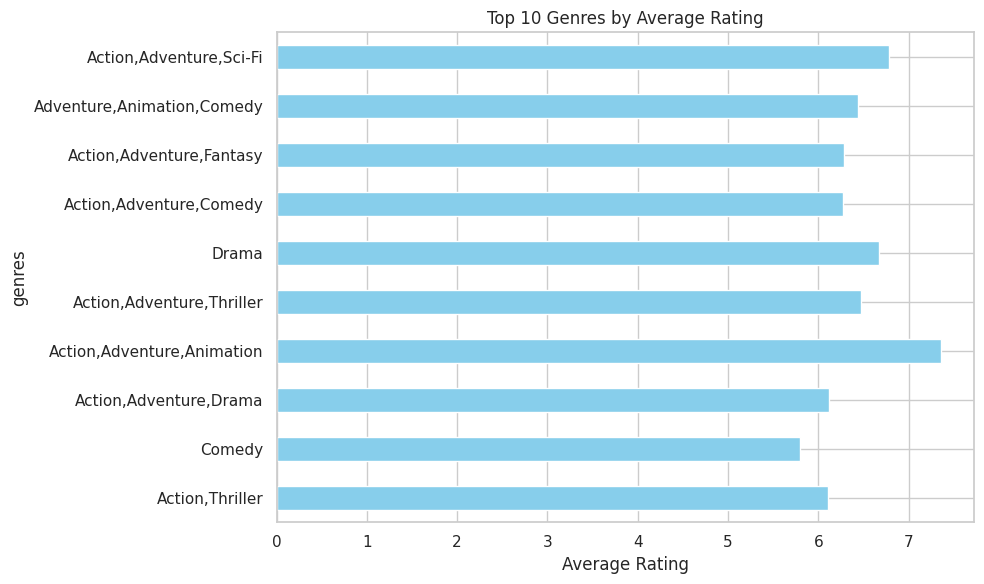

In [822]:
# Bar Plot 1: Average Rating by Genre
plt.figure(figsize=(10, 6))
top_genres['averagerating'].plot(kind='barh', color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.gca().invert_yaxis()  # Highest rating on top
plt.tight_layout()
plt.show()

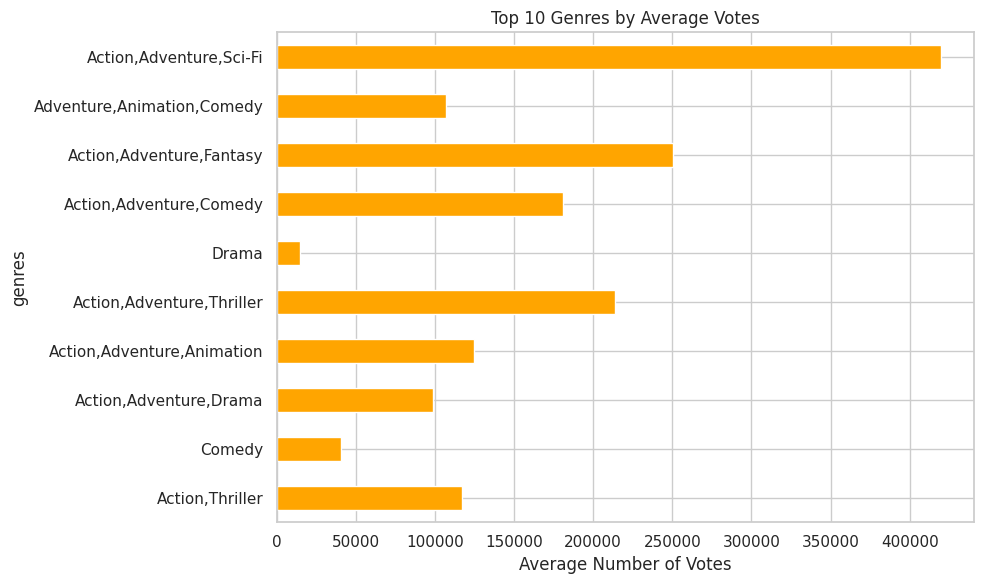

In [823]:
# Bar Plot 2: Average Votes by Genre
plt.figure(figsize=(10, 6))
top_genres['numvotes'].plot(kind='barh', color='orange')
plt.xlabel('Average Number of Votes')
plt.title('Top 10 Genres by Average Votes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

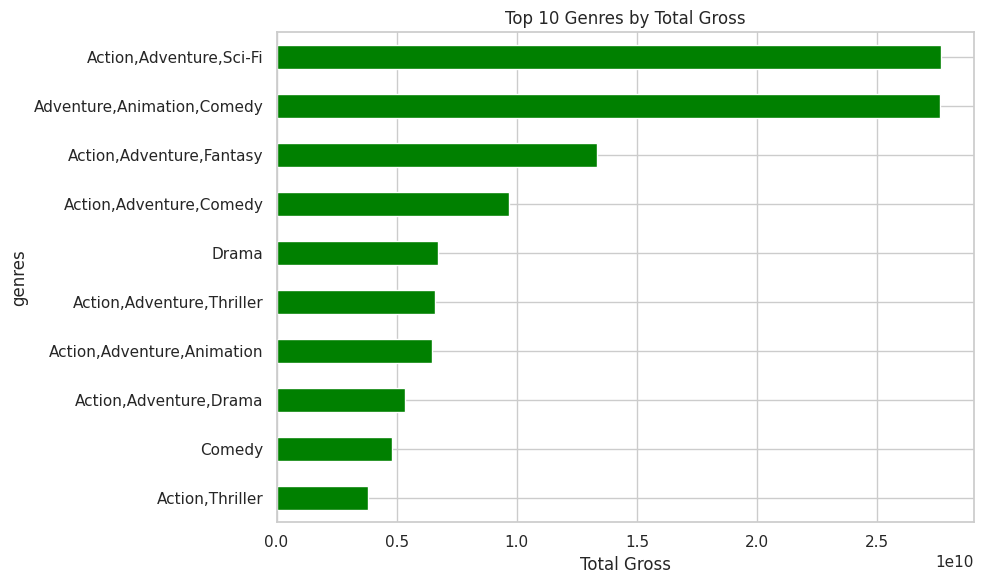

In [824]:
# Bar Plot 3: Total Gross by Genre
plt.figure(figsize=(10, 6))
top_genres['total_gross'].plot(kind='barh', color='green')
plt.xlabel('Total Gross')
plt.title('Top 10 Genres by Total Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## II) Succesful Studios
The aim for this analyses is to help microsoft know who the bigboys are in thisa industry in terms of producing quality and succesful movies.

In [825]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce').fillna(0)
studio_performance = df.groupby('studio').agg(
    total_films=('title', 'count'),
    avg_domestic_gross=('domestic_gross', 'mean'),
    avg_foreign_gross=('foreign_gross', 'mean'),
    total_domestic_gross=('domestic_gross', 'sum'),
    total_foreign_gross=('foreign_gross', 'sum')
).sort_values(by='total_domestic_gross', ascending=False)

In [826]:
top_p_studios = studio_performance.head(10)
top_p_studios

,total_films,avg_domestic_gross,avg_foreign_gross,total_domestic_gross,total_foreign_gross
studio,,,,,
BV,106,1.737644e+08,2.433382e+08,1.841903e+10,2.579385e+10
Uni.,147,8.777138e+07,1.146583e+08,1.290239e+10,1.685477e+10
WB,140,8.691461e+07,1.333422e+08,1.216805e+10,1.866790e+10
Fox,136,8.051103e+07,1.474696e+08,1.094950e+10,2.005587e+10
Sony,110,7.691894e+07,1.267760e+08,8.461083e+09,1.394535e+10
Par.,101,7.609773e+07,1.174593e+08,7.685871e+09,1.186338e+10
LGF,103,4.000353e+07,4.352058e+07,4.120363e+09,4.482619e+09
WB (NL),45,8.879333e+07,1.408667e+08,3.995700e+09,6.339000e+09
LG/S,41,5.068780e+07,8.179815e+07,2.078200e+09,3.353724e+09


In [827]:
top_studios = studio_performance.head(20)
top_studios

,total_films,avg_domestic_gross,avg_foreign_gross,total_domestic_gross,total_foreign_gross
studio,,,,,
BV,106,1.737644e+08,2.433382e+08,1.841903e+10,2.579385e+10
Uni.,147,8.777138e+07,1.146583e+08,1.290239e+10,1.685477e+10
WB,140,8.691461e+07,1.333422e+08,1.216805e+10,1.866790e+10
Fox,136,8.051103e+07,1.474696e+08,1.094950e+10,2.005587e+10
Sony,110,7.691894e+07,1.267760e+08,8.461083e+09,1.394535e+10
Par.,101,7.609773e+07,1.174593e+08,7.685871e+09,1.186338e+10
LGF,103,4.000353e+07,4.352058e+07,4.120363e+09,4.482619e+09
WB (NL),45,8.879333e+07,1.408667e+08,3.995700e+09,6.339000e+09
LG/S,41,5.068780e+07,8.179815e+07,2.078200e+09,3.353724e+09


Visualisations to help interprate the data above.

---

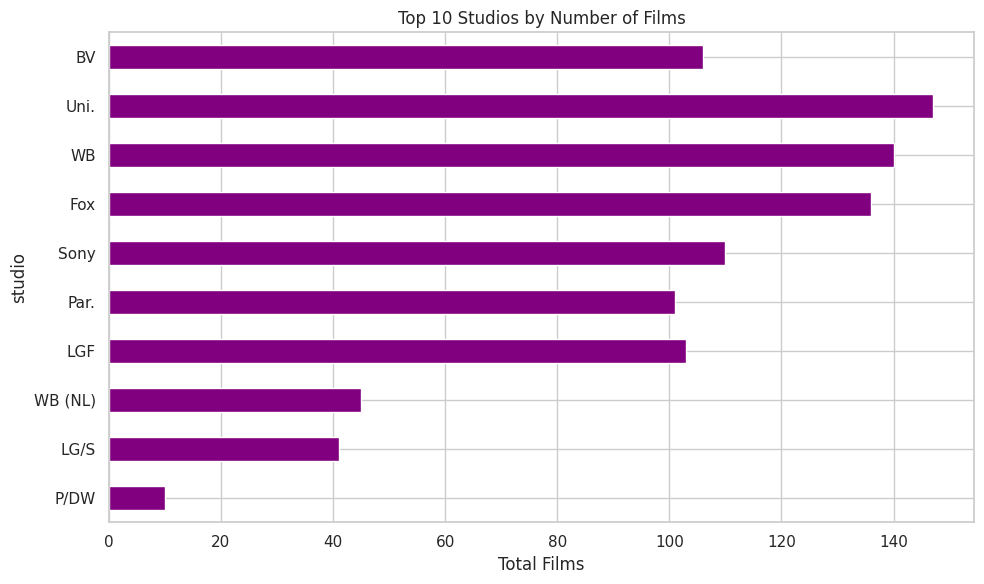

In [828]:
# Bar Plot: Total Number of Films per Studio
plt.figure(figsize=(10, 6))
top_p_studios['total_films'].plot(kind='barh', color='purple')
plt.xlabel('Total Films')
plt.title('Top 10 Studios by Number of Films')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

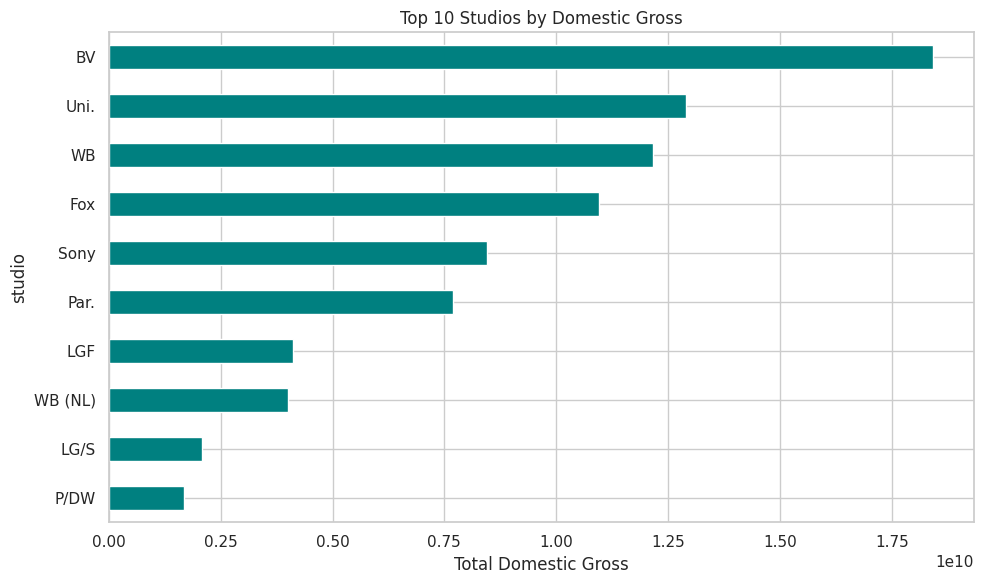

In [829]:
# Bar Plot: Total Domestic Gross
plt.figure(figsize=(10, 6))
top_p_studios['total_domestic_gross'].plot(kind='barh', color='teal')
plt.xlabel('Total Domestic Gross')
plt.title('Top 10 Studios by Domestic Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

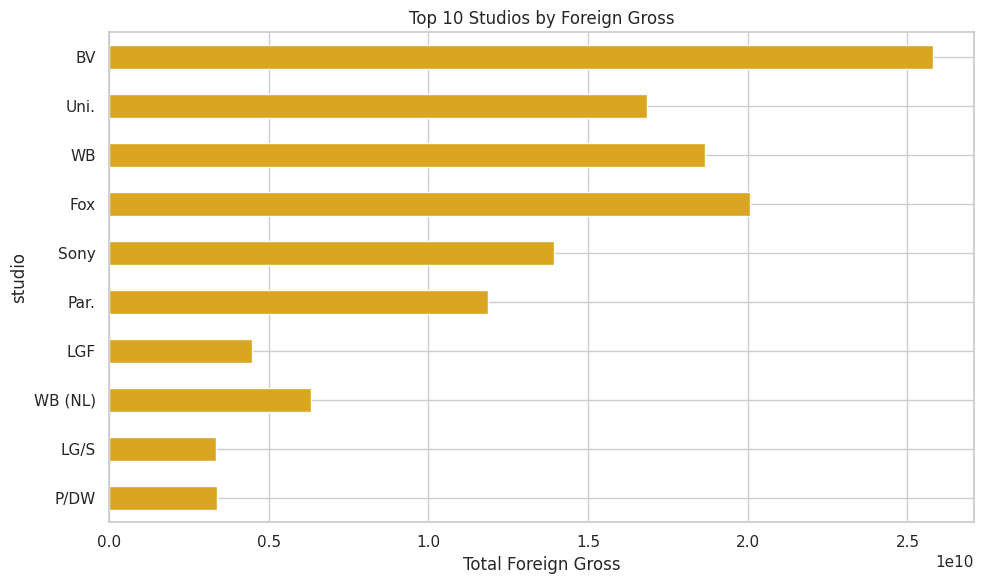

In [830]:
# Bar Plot: Total Foreign Gross
plt.figure(figsize=(10, 6))
top_p_studios['total_foreign_gross'].plot(kind='barh', color='goldenrod')
plt.xlabel('Total Foreign Gross')
plt.title('Top 10 Studios by Foreign Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

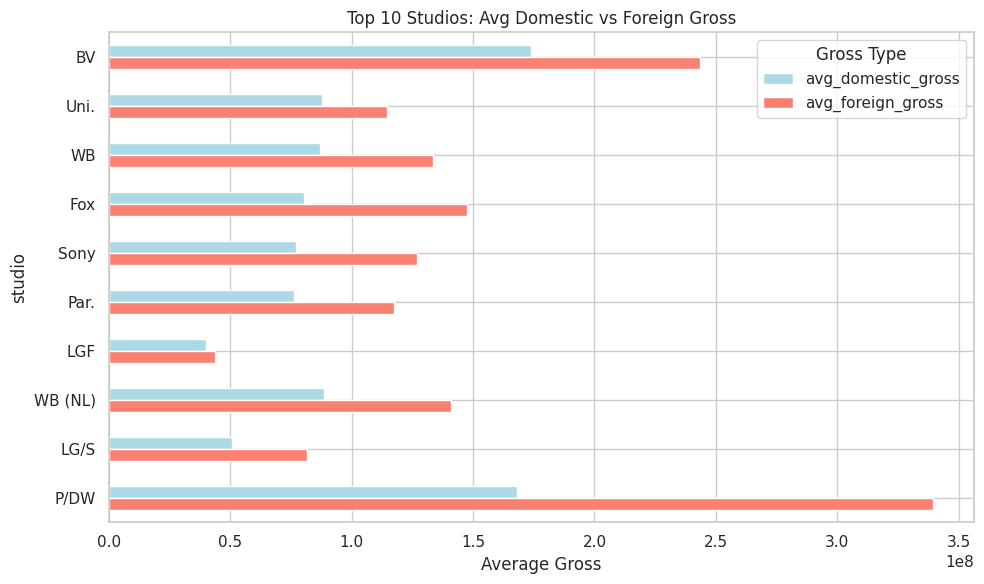

In [831]:
# Bar Plot: Average Domestic vs. Foreign Gross
top_p_studios[['avg_domestic_gross', 'avg_foreign_gross']].plot(
    kind='barh',
    figsize=(10, 6),
    color=['lightblue', 'salmon']
)
plt.xlabel('Average Gross')
plt.title('Top 10 Studios: Avg Domestic vs Foreign Gross')
plt.legend(title='Gross Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Correlation between studio performance metrics

---

In [832]:
correlation_matrix = studio_performance.corr(numeric_only=True)


In [833]:
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      total_films  avg_domestic_gross  avg_foreign_gross  \
total_films              1.000000            0.491002           0.209833   
avg_domestic_gross       0.491002            1.000000           0.480984   
avg_foreign_gross        0.209833            0.480984           1.000000   
total_domestic_gross     0.650532            0.795710           0.363649   
total_foreign_gross      0.668212            0.787956           0.390385   

                      total_domestic_gross  total_foreign_gross  
total_films                       0.650532             0.668212  
avg_domestic_gross                0.795710             0.787956  
avg_foreign_gross                 0.363649             0.390385  
total_domestic_gross              1.000000             0.989251  
total_foreign_gross               0.989251             1.000000  


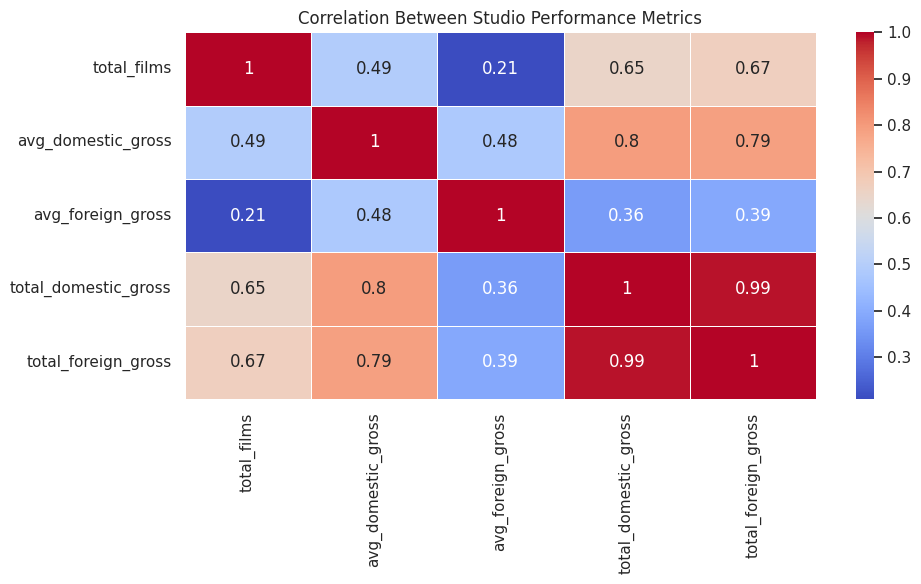

In [834]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Studio Performance Metrics')
plt.tight_layout()
plt.show()

## Runtime Analysis
We now get to see how long a success movie takes.

In [835]:
Final_data['runtime_minutes'] = pd.to_numeric(Final_data['runtime_minutes'], errors='coerce')

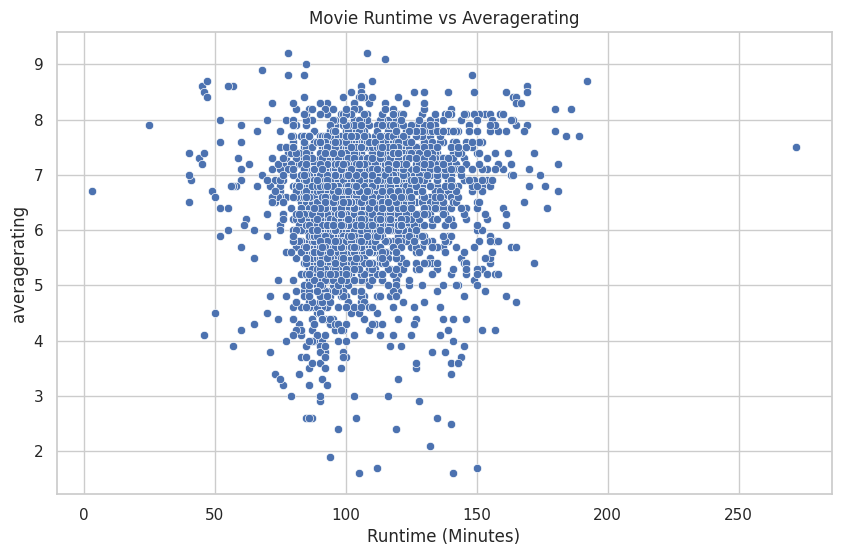

In [836]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Final_data, x='runtime_minutes', y='averagerating')
plt.title('Movie Runtime vs Averagerating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('averagerating')
plt.grid(True)
plt.show()

In [837]:
print("Correlation between runtime and averagerating:", Final_data['runtime_minutes'].corr(Final_data['averagerating']))

Correlation between runtime and averagerating: 0.1511246295455419
